# Perceptron Algorithm



The Perceptron algorithm is a simple supervised learning algorithm used for binary classification tasks. It can be seen as a single unit of an artificial neural network and is also known as the prototype for Neural Nets.

 In perceptron learning we adjust the weights and bias term so that the perceptron can correctly classify the training data. If the training data is linearly separable (i.e., a straight line can separate the classes), the perceptron will converge to a solution. However, if the data is not linearly separable, the Perceptron Learning Rule may not converge to a solution.

 <!-- Perceptron Learning rule (weight update):
 $$ w^{(i)}_j = w^{(i)}_j + \eta( y_j - \hat{y_j}) X_i$$

 In this equation:
  - $w^{(i)}_j$ is the connection weight between $i^{th}$ oberservation and $j^{th}$ feature.
  - $X_i$ is the $i^{th}$ oberservation of the current training instance.
  - $\hat{y_j}$ is the output of $j^{th}$ output observation for current training instance.
  - $y_i$ is the target output of the $j^{th}$ observation for current training instance.
  - $\eta$ is the learning rate. -->



In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Initializing a Linearly seperable dataset


- Generating a dataset of 100 random samples with 2-dimensional input.
- To ensure the dataset is linearly separable, we introduce a margin of 0.5 (arbitrary).

In [3]:
X_ = np.random.rand(100, 2)   # Generate random data points
X_ = (X_-np.mean(X_))*10      # Center the data around the origin by subtracting the mean and scaling by 10

X, y = [], []

perp = lambda i: -1*i[0]/i[1]
sign = lambda i: 2*int(i >= 0)-1

w = np.array([1, 1])/np.sqrt(2)
gamma = 0.5

# linearly seperable dataset with 0.5 margin
for p in X_:
  d = w@p.T
  if abs(d) >= gamma:
    X.append(p)
    y.append(sign(d))

X = np.array(X)
y = np.array(y)

## Visualizing the data


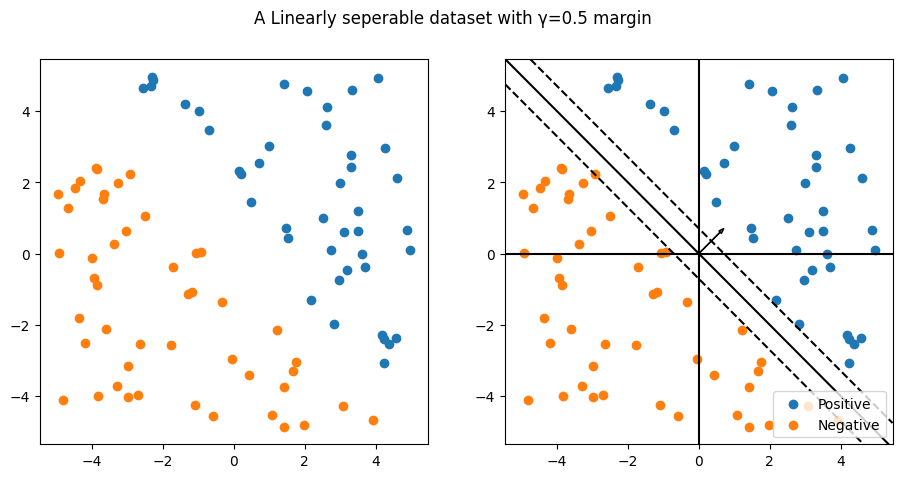

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)
fig.suptitle(f'A Linearly seperable dataset with γ={gamma} margin')

cluster_colors = [i[1]['color'] for i in zip(range(3), plt.rcParams['axes.prop_cycle']())]
ax1.scatter(X[:, 0][y==1], X[:, 1][y==1], color=cluster_colors[0], label='Positive')
ax1.scatter(X[:, 0][y!=1], X[:, 1][y!=1], color=cluster_colors[1], label='Negative')

ax2.scatter(X[:, 0][y==1], X[:, 1][y==1], color=cluster_colors[0], label='Positive')
ax2.scatter(X[:, 0][y!=1], X[:, 1][y!=1], color=cluster_colors[1], label='Negative')
ax2.legend(loc='lower right')

ax2.axvline(x=0, c='black')
ax2.axhline(y=0, c='black')

ax2.arrow(0, 0, w[0], w[1], length_includes_head=True, head_width=0.1)
ax2.axline([0, 0], slope=perp(w), c='black')
ax2.axline(w*gamma, slope=perp(w), c='black', linestyle="--")
ax2.axline(w*-1*gamma, slope=perp(w), c='black', linestyle="--")

plt.show()

## Perceptron Algorithm for Linear Separability

In the following cell we implement the perceptron learning algorithm to find a decision boundary (represented by the weight vector `w`) that correctly classifies data points based on their features and labels. It iteratively updates the weight vector until all data points are classified correctly.

- The `sign` function is used to determine the sign of a value. If the input `i` is greater than or equal to 0, it returns 1; otherwise, it returns -1.
- We initialize weight vector `w` as a zero vector.
- The core of the Perceptron learning algorithm is the iterative update of the weight vector w until all data points are classified correctly. Weight vector is updated as per the following formula:
$$w_j ← w_j + X^{(i)}_j · y^{(i)} \quad where,\ j\ is\ the\ j^{th}\ feature\ and\ i\ is\ the\ i^{th}\ obeservation$$
- Eventually, we will have no misclassified data points and thats when `else` statement will terminate the `while` loop. However, if the dataset is not linearly seperable the `while` loop can run indefinitely.


In [ ]:
# Perceptron to find w

sign = lambda i: 2*int(i>=0)-1 # if i>=0 returns 1, else -1
# def sign(i):
#   return 2*int(i>=0) - 1

n = X.shape[0]
w = np.zeros(X.shape[1])


while True:
  for i in range(n):
    # if misclassified
    if sign(X[i].T@w) != y[i]:
      w = w + y[i] * X[i]
      break # --> 1
  else:
    # If all datapoints in X is classified correctly.
    break

w

array([3.81777335, 4.00717033])

In the following code we visiualize the decision boundary that is represented by a line starting from the origin and having a slope perpendicular to the weight vector `w`.

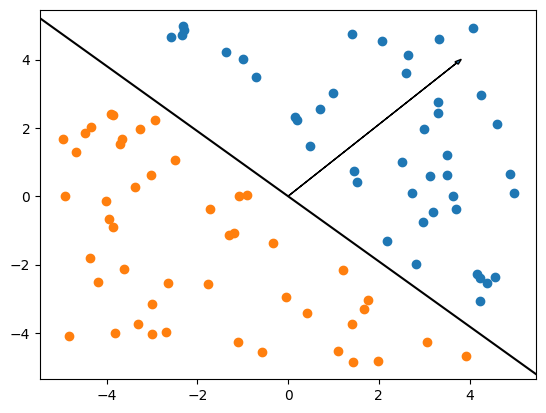

In [ ]:
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], color=cluster_colors[0], label='Positive')
plt.scatter(X[:, 0][y!=1], X[:, 1][y!=1], color=cluster_colors[1], label='Negative')

plt.arrow(0, 0, w[0], w[1], length_includes_head=True, head_width=0.1)

perp = lambda w: -1*w[0]/w[1]
plt.axline([0, 0], slope=perp(w), c='black');